## Module 2 - Classification

##### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [2]:
df = pd.read_csv('merged.csv', index_col = [0])

In [3]:
df

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016-01-01,1,2016,1,SEA,JFK,1,741.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016-01-01,1,2016,1,SEA,SFO,1,759.0,1.0,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016-01-01,1,2016,1,SEA,LAX,1,705.0,0.0,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016-01-01,1,2016,1,SEA,IAH,1,740.0,0.0,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016-01-01,1,2016,1,SEA,ATL,1,742.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840269,2017-09-23,3,2017,9,JFK,LAX,23,2146.0,0.0,2143,...,1017,0,68,15,86,86,55,2017-09-23,2100,JFK
1840270,2017-09-24,3,2017,9,MCO,LAX,24,2008.0,0.0,2016,...,1012,14,71,19,82,82,71,2017-09-24,2000,MCO
1840271,2017-09-24,3,2017,9,MCO,JFK,24,1948.0,0.0,1954,...,1012,14,71,19,82,82,71,2017-09-24,2000,MCO
1840272,2017-09-24,3,2017,9,MCO,EWR,24,2224.0,1.0,2140,...,1012,0,72,18,81,81,75,2017-09-24,2100,MCO


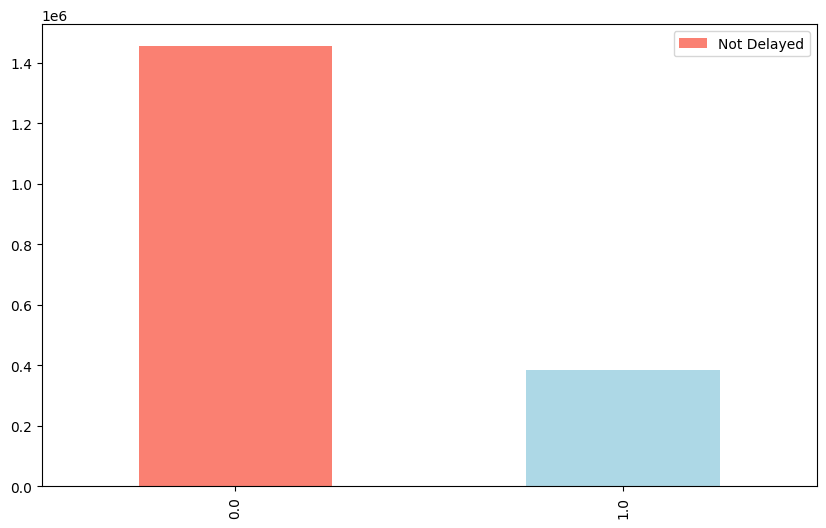

In [4]:
plt.figure(figsize = (10, 6))
df['ArrDel15'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.legend(['Not Delayed', 'Delayed']);

##### Class Imbalance
The class imbalance present can affect the performance of the classification models. This can lead to a bias in favor of the majority class, resulting in lower recall for the **Delayed Flights (1.0 - Minority Class)**.

In [5]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

##### A little data analysis

In [12]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

C:\Users\nitin\AppData\Local\Temp\ipykernel_9796\925056589.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax = ax)


<AxesSubplot: >

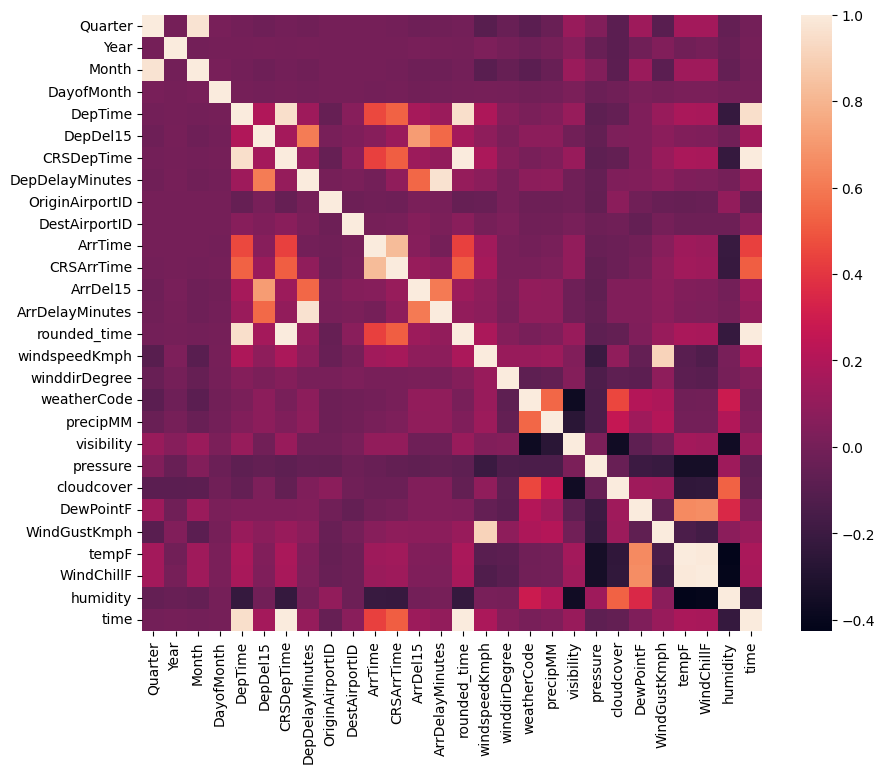

In [13]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), ax = ax)

##### Deleting Redundant Information
"OriginAirport ID" and "DestAirportID" can be dropped from the dataset since they contain redundant information already present in the "Origin" and "Dest". Additionally, there is both "Quarter" and "Month" columns, but we only need one of them. Either of these columns can serve the purpose. Furthermore, there are columns named "CRSArrTime," "ArrTime," and "ArrDelayMinutes" that hold information about flight delays, which should be dropped.

In [14]:
df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'time', 'Quarter'])

In [15]:
df.columns

Index(['Year', 'Month', 'Origin', 'Dest', 'DayofMonth', 'DepTime', 'DepDel15',
       'CRSDepTime', 'DepDelayMinutes', 'ArrDel15', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'humidity'],
      dtype='object')

##### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])

In [17]:
X = df.drop('ArrDel15', axis = 1)
y = df['ArrDel15']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 3000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.921265  0.977901  0.948738  436766.000000
1.0            0.890896  0.683455  0.773509  115317.000000
accuracy       0.916398  0.916398  0.916398       0.916398
macro avg      0.906080  0.830678  0.861124  552083.000000
weighted avg   0.914921  0.916398  0.912137  552083.000000


##### Logistic Regression Result Analysis

The low recall score observed for **Delayed flights (Class : 1.0)** is because of the class imbalance that is present. It still indicates a reasonable ability to identify delayed flights. 
While the model achieves an accuracy score of **~91.6**, the recall score for **Class 1.0** can be improved with resampling techniques. 

In [20]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
dtree_acc = round(accuracy_score(y_test, dtreepred),2)

report = classification_report(y_test, dtreepred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[397838  38928]
 [ 33945  81372]]
87.0
              precision    recall  f1-score        support
0.0            0.921384  0.910872  0.916098  436766.000000
1.0            0.676409  0.705638  0.690714  115317.000000
accuracy       0.868004  0.868004  0.868004       0.868004
macro avg      0.798897  0.808255  0.803406  552083.000000
weighted avg   0.870215  0.868004  0.869021  552083.000000


In [26]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
nb_acc = round(accuracy_score(y_test, gaussiannbpred),2)

report = classification_report(y_test, gaussiannbpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[407166  29600]
 [ 27492  87825]]
90.0
              precision    recall  f1-score        support
0.0            0.936750  0.932229  0.934484  436766.000000
1.0            0.747924  0.761596  0.754698  115317.000000
accuracy       0.896588  0.896588  0.896588       0.896588
macro avg      0.842337  0.846913  0.844591  552083.000000
weighted avg   0.897309  0.896588  0.896931  552083.000000


In [21]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[427743   9023]
 [ 35515  79802]]
92.0
              precision    recall  f1-score        support
0.0            0.923336  0.979341  0.950515  436766.000000
1.0            0.898418  0.692023  0.781828  115317.000000
accuracy       0.919327  0.919327  0.919327       0.919327
macro avg      0.910877  0.835682  0.866171  552083.000000
weighted avg   0.918132  0.919327  0.915280  552083.000000


In [24]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[425741  11025]
 [ 34703  80614]]
92.0
              precision    recall  f1-score        support
0.0            0.924631  0.974758  0.949033  436766.000000
1.0            0.879691  0.699064  0.779045  115317.000000
accuracy       0.917172  0.917172  0.917172       0.917172
macro avg      0.902161  0.836911  0.864039  552083.000000
weighted avg   0.915244  0.917172  0.913527  552083.000000


In [20]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Gausian NB', 'XGBoost'],
                'Score': [rfc_acc, dtree_acc, nb_acc, xgb_acc]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.92
3,XGBoost,0.92
2,Gausian NB,0.90
1,Decision Tree Classifier,0.87


##### Analysis of the results
A common trend among the results of the models is a **low recall score** for the **Delayed Class (1.0)**. This can be improved by resampling techniques.

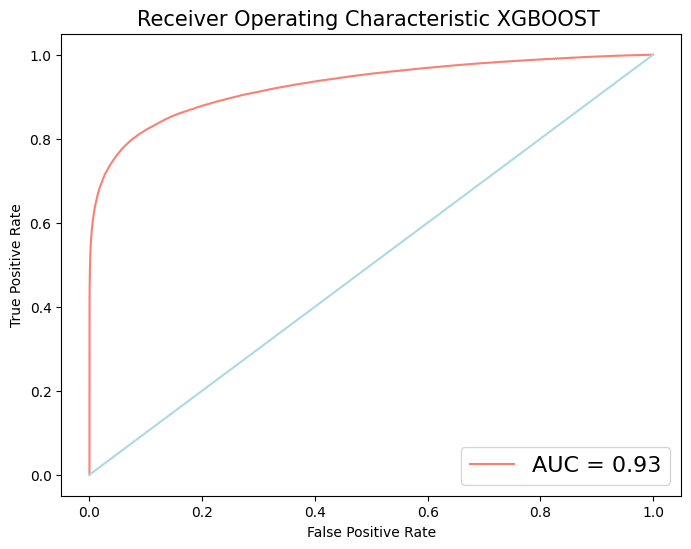

In [22]:
# XGBOOST ROC/AUC (Best Model)
from sklearn import metrics
fig, ax  = plt.subplots(figsize = (8, 6))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, label = 'AUC = %0.2f' % roc_aucxgb, color = 'salmon')
ax.plot([0, 1], [0, 1], color = 'lightblue')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 10)
ax.set_xlabel('False Positive Rate', fontsize = 10)
ax.legend(loc = 'lower right', prop = {'size': 16});

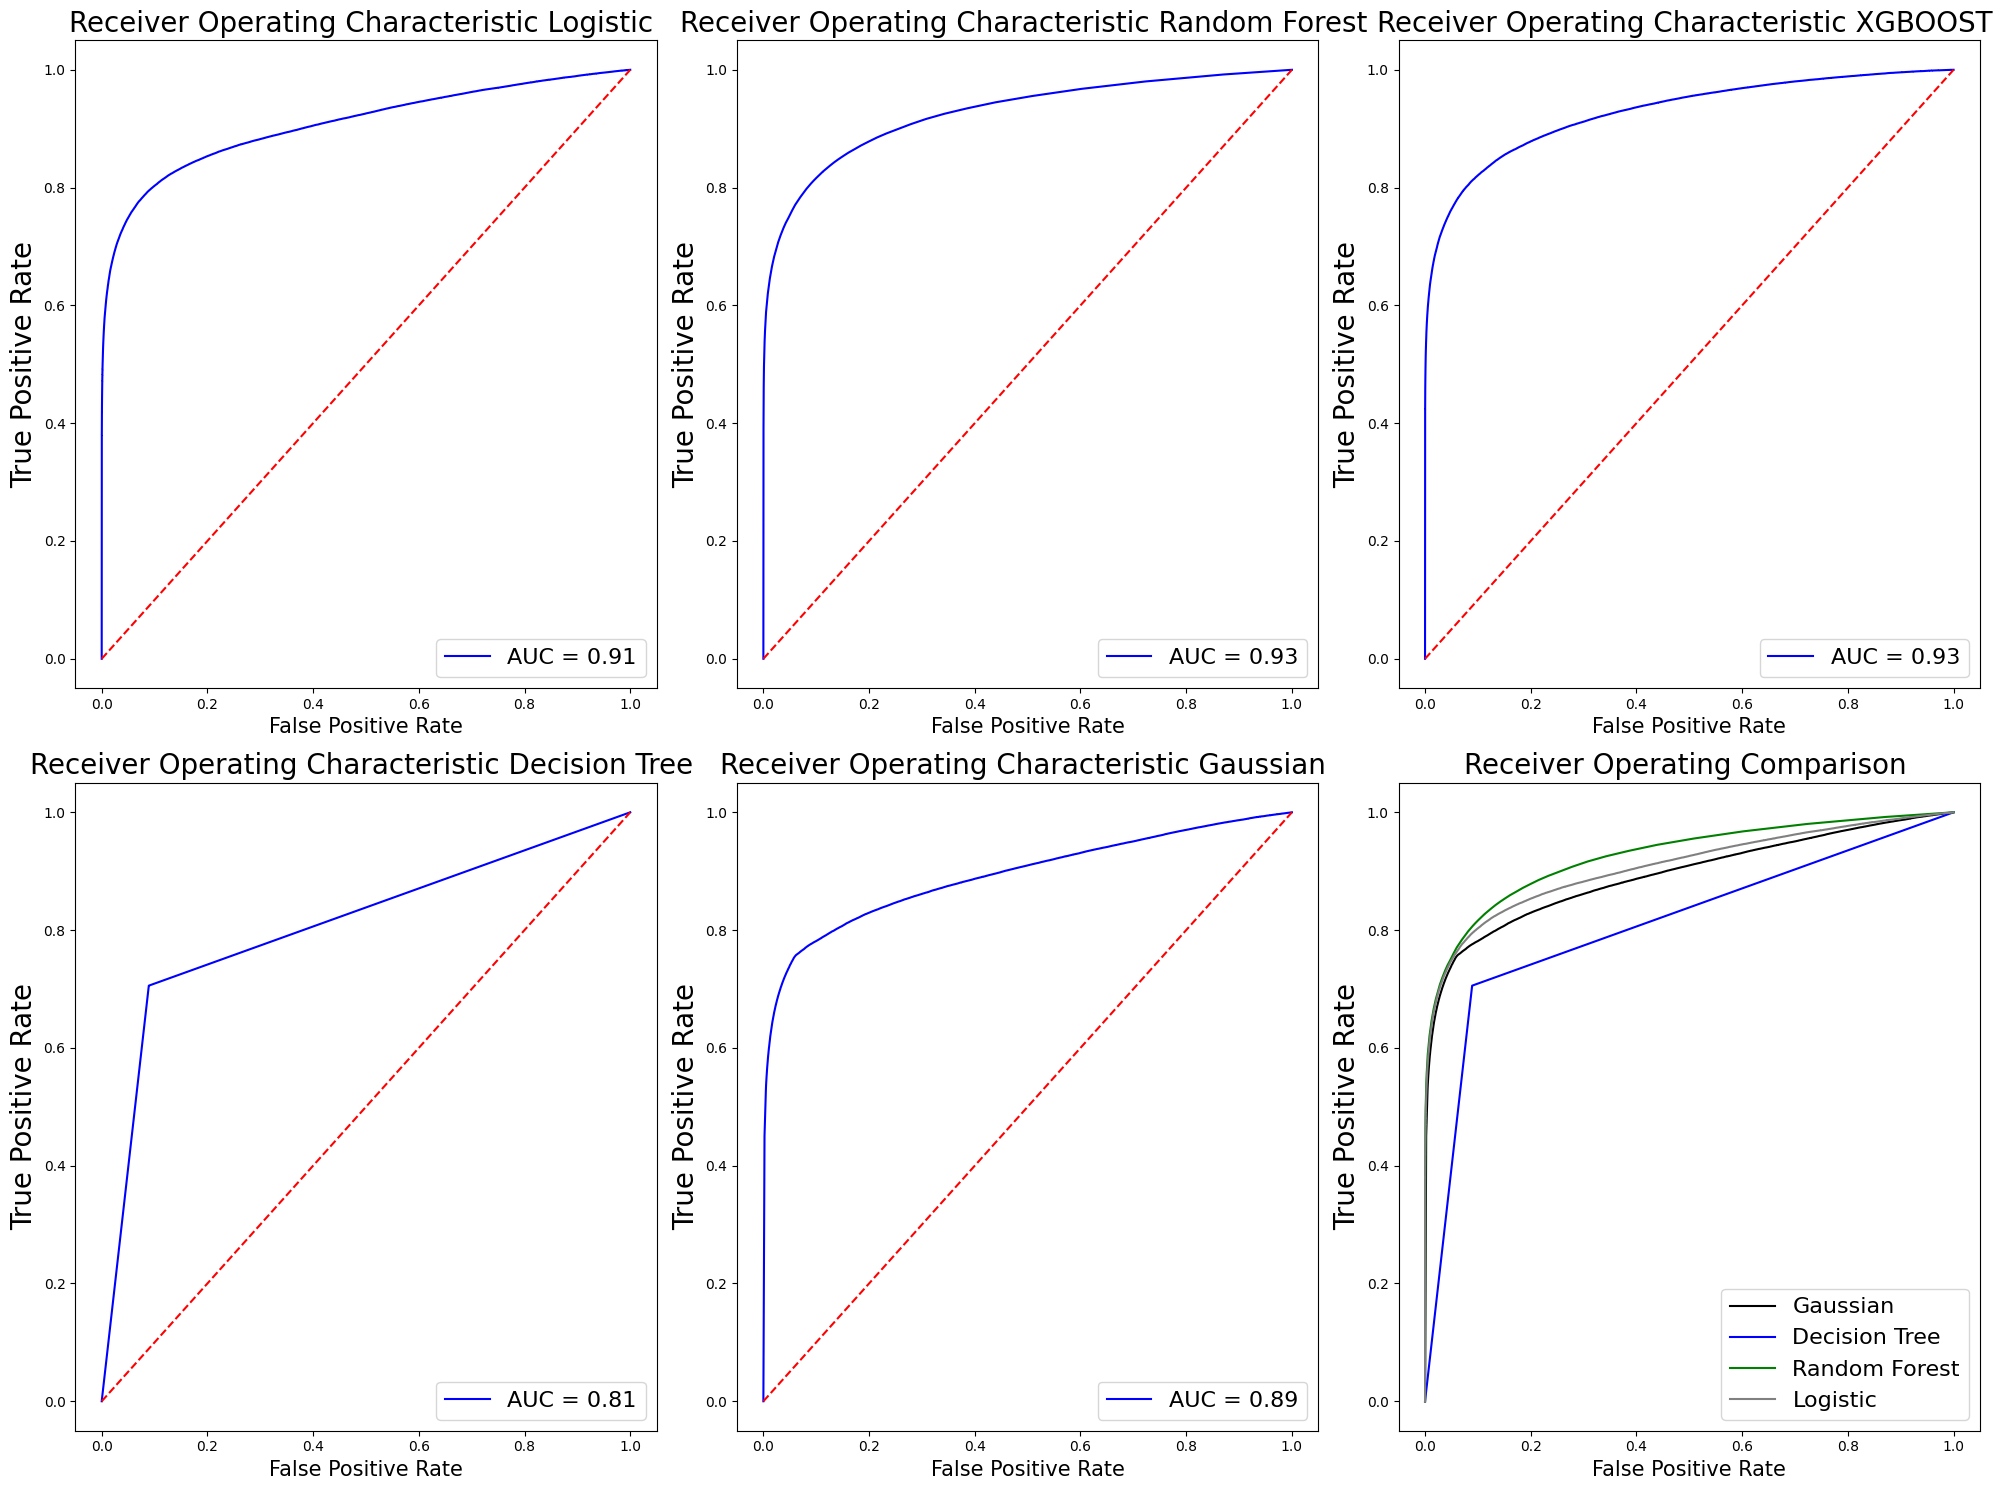

In [27]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LogisticRegression
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize = 20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RandomForest
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#XGBoost
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic XGBOOST ',fontsize = 20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16});

#DTree
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#NaiveBayes
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#CombinedPLot
ax_arr[1,2].plot(fprgau, tprgau,  label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree,  label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprrfc, tprrfc,  label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog,  label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

##### Resampling

In [29]:
pip install imblearn

                                              0.0/235.6 kB ? eta -:--:--
     -------------------------------------  235.5/235.6 kB 7.3 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
#Raw Over and Under Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

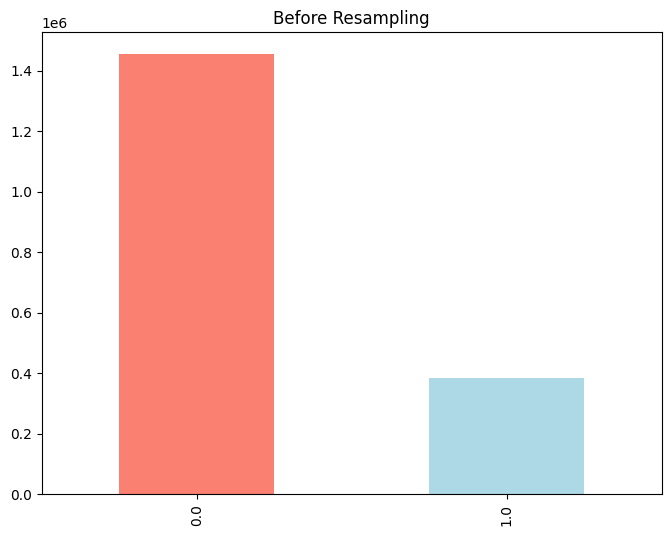

In [31]:
plt.figure(figsize = (8, 6))
y.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('Before Resampling');

##### Raw Over Sampling

In [32]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

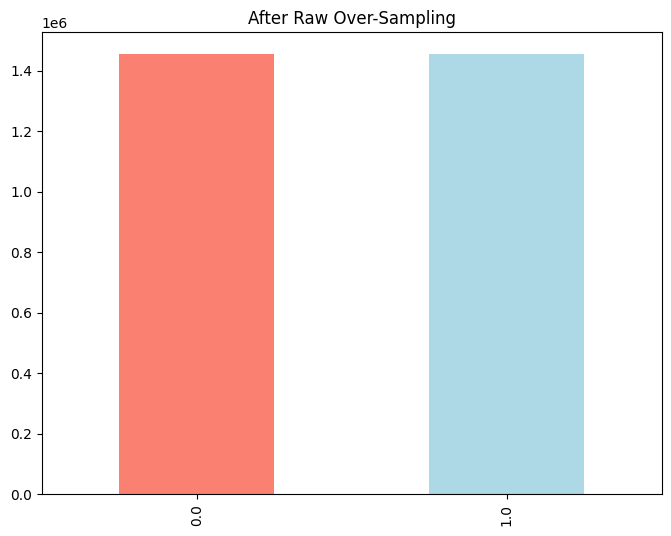

In [33]:
plt.figure(figsize = (8, 6))
y_resampled.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('After Raw Over-Sampling');

In [34]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909110 entries, 0 to 2909109
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Month            int64  
 2   Origin           int32  
 3   Dest             int32  
 4   DayofMonth       int64  
 5   DepTime          float64
 6   DepDel15         float64
 7   CRSDepTime       int64  
 8   DepDelayMinutes  float64
 9   windspeedKmph    int64  
 10  winddirDegree    int64  
 11  weatherCode      int64  
 12  precipMM         float64
 13  visibility       int64  
 14  pressure         int64  
 15  cloudcover       int64  
 16  DewPointF        int64  
 17  WindGustKmph     int64  
 18  tempF            int64  
 19  humidity         int64  
dtypes: float64(4), int32(2), int64(14)
memory usage: 421.7 MB


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [36]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 3000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.806982  0.927521  0.863063  436469.000000
1.0            0.914746  0.778047  0.840877  436264.000000
accuracy       0.852801  0.852801  0.852801       0.852801
macro avg      0.860864  0.852784  0.851970  872733.000000
weighted avg   0.860852  0.852801  0.851973  872733.000000


##### Logisitic Regression Result Analysis after Over Sampling
An increased recall for the **Delayed Class** indicates that the model is capturing a higher proportion of the actual positive instances (Class "1.0") compared to before. This suggests improved sensitivity in identifying positive instances. However a **dip in the accuracy can also be observed**. The drop in accuracy is possibly due to the trade-off between precision and recall. The increase in recall of one class often comes comes at the cost of precision, which can impact overall accuracy. 

In [30]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[413765  22439]
 [  7648 428881]]
97.0
              precision    recall  f1-score        support
0.0            0.981852  0.948558  0.964918  436204.000000
1.0            0.950281  0.982480  0.966112  436529.000000
accuracy       0.965526  0.965526  0.965526       0.965526
macro avg      0.966066  0.965519  0.965515  872733.000000
weighted avg   0.966061  0.965526  0.965515  872733.000000


In [31]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[402226  33978]
 [ 85809 350720]]
86.0
              precision    recall  f1-score        support
0.0            0.824174  0.922105  0.870394  436204.000000
1.0            0.911676  0.803429  0.854137  436529.000000
accuracy       0.862745  0.862745  0.862745       0.862745
macro avg      0.867925  0.862767  0.862265  872733.000000
weighted avg   0.867942  0.862745  0.862262  872733.000000


In [32]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
nb_acc = round(accuracy_score(y_test, gaussiannbpred),2)

report = classification_report(y_test, gaussiannbpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[404802  31402]
 [102954 333575]]
85.0
              precision    recall  f1-score        support
0.0            0.797237  0.928011  0.857668  436204.000000
1.0            0.913962  0.764153  0.832371  436529.000000
accuracy       0.846051  0.846051  0.846051       0.846051
macro avg      0.855599  0.846082  0.845019  872733.000000
weighted avg   0.855621  0.846051  0.845014  872733.000000


In [33]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
dtree_acc = round(accuracy_score(y_test, dtreepred),2)

report = classification_report(y_test, dtreepred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[390831  45373]
 [  8544 427985]]
94.0
              precision    recall  f1-score        support
0.0            0.978607  0.895982  0.935473  436204.000000
1.0            0.904147  0.980427  0.940743  436529.000000
accuracy       0.938221  0.938221  0.938221       0.938221
macro avg      0.941377  0.938205  0.938108  872733.000000
weighted avg   0.941363  0.938221  0.938109  872733.000000


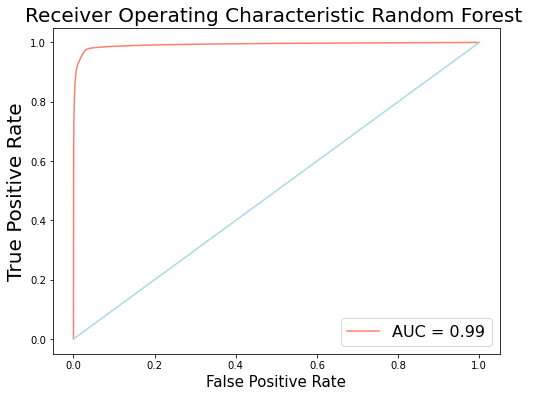

In [34]:
# RandomForest AUC (Best Model)
fig, ax  = plt.subplots(figsize = (8, 6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, label = 'AUC = %0.2f' % roc_aucrfc, color = 'salmon')
ax.plot([0, 1], [0, 1], color = 'lightblue')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

##### Random Forest Classifier Result Analysis after Over Sampling
An accuracy of **97%** is achieved with the random forest classifier, with **good recall values** for both the classes. Random Forest Classifiers are **less prone to over-fitting**  because of the randomness introduced in both sampling and selection of features.

##### Raw Under-Sampling

In [35]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

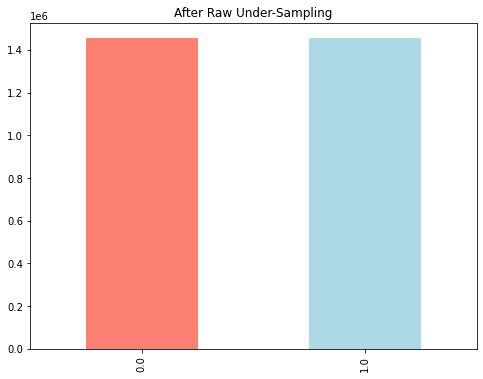

In [36]:
plt.figure(figsize = (8, 6))
y_resampled.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('After Raw Under-Sampling');

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [38]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 3000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.807027  0.927050  0.862885  436447.000000
1.0            0.914268  0.778246  0.840791  436286.000000
accuracy       0.852662  0.852662  0.852662       0.852662
macro avg      0.860648  0.852648  0.851838  872733.000000
weighted avg   0.860638  0.852662  0.851840  872733.000000


In [37]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[413817  22652]
 [  7652 428612]]
97.0
              precision    recall  f1-score        support
0.0            0.981844  0.948102  0.964678  436469.000000
1.0            0.949803  0.982460  0.965856  436264.000000
accuracy       0.965277  0.965277  0.965277       0.965277
macro avg      0.965824  0.965281  0.965267  872733.000000
weighted avg   0.965828  0.965277  0.965267  872733.000000


In [40]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[402404  34043]
 [ 85551 350735]]
86.0
              precision    recall  f1-score        support
0.0            0.824674  0.922000  0.870626  436447.000000
1.0            0.911526  0.803911  0.854343  436286.000000
accuracy       0.862966  0.862966  0.862966       0.862966
macro avg      0.868100  0.862955  0.862484  872733.000000
weighted avg   0.868092  0.862966  0.862486  872733.000000


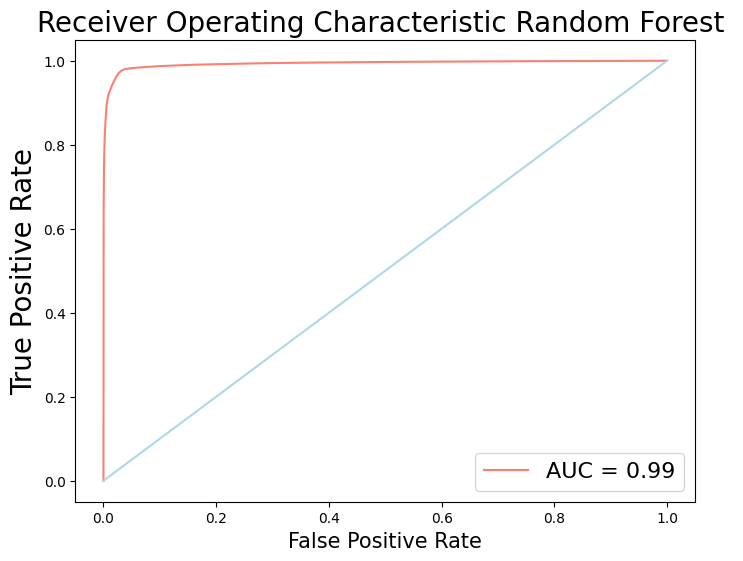

In [38]:
# RandomForest AUC (Best Model)
fig, ax  = plt.subplots(figsize = (8, 6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, label = 'AUC = %0.2f' % roc_aucrfc, color = 'salmon')
ax.plot([0, 1], [0, 1], color = 'lightblue')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

##### Classification Results
The **Random Forest Classifier's** ensemble nature combined with under and oversampling mitigated biases and learned class patterns effectively, leading to **accurate predictions, strong recall for both classes, and robust performance in addressing class imbalance.** Other models experience a dip in accuracy after being trained on under or oversampled data, it could be due to overfitting.

In [39]:
import pickle as pkl

In [40]:
pkl.dump(rfc, open('rfc.pkl', 'wb'))